In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import re
from wordcloud import WordCloud


# Preprocessing and evaluation
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

pd.set_option('display.max_colwidth', 500)
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/mayorofgeology/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mayorofgeology/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mayorofgeology/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mayorofgeology/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Data Loading

In [2]:
df1 = pd.read_excel('BBN2021.xlsx', sheet_name='Tweets')
df2 = pd.read_excel('BBNaija2021-3.xlsx', sheet_name='Tweets')

df = pd.concat((df1, df2), axis=0).reset_index(drop=True)
df.head(1)

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,The Whistler Newspaper,@TheWhistlerNG,2021-09-27 12:15:09,"This is coming after Pere and Angel who were asked to leave the house during the Sunday live eviction show, were moved to a white room.\n\n#BBNaija6 #BBNaija pere\n#thewhistlerng #Biggie https://t.co/cUT67ite7M",NaN,https://www.twitter.com/user/status/1442462817223909380,0,3,24.42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           20000 non-null  object        
 1   Username       20000 non-null  object        
 2   UTC Date       20000 non-null  datetime64[ns]
 3   Tweet          20000 non-null  object        
 4   Binders        0 non-null      float64       
 5   Permalink      20000 non-null  object        
 6   Retweet count  20000 non-null  int64         
 7   Likes count    20000 non-null  int64         
 8   Tweet value    20000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.4+ MB


### Helper 

In [4]:
class CleanTweet():
    '''
    Remove non-english characters and newline char
    Remove numbers, hyperlink, mentions and hashtags
    '''
    def __init__(self, pattern):
        self.pattern = pattern

    def __call__(self, text):
        if isinstance(text, str):
            tweet = text

        tweet = re.sub(self.pattern, '', tweet)

        return tweet
    
clean = CleanTweet(r'(\n+)|([0-9])|(#?\s?[^\u0000-\u05C0\u2100-\u214F]+)|'
                   r'(#[A-Za-z0-9]+)|(https?:\/\/.*[\r\n]*)|(@[A-Za-z0-9]+)')

def cleanLemmatize(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

def plotWordCloud(df, title):
    '''
    Word Cloud
    '''    
    wc = WordCloud(max_words=1000, min_font_size=10,
                    height=800,width=1600,background_color="white", 
                    colormap='flare').generate(' '.join(df['Cleaned Tweet']))
    plt.figure(1, figsize=(15, 15))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wc)

def getSentiment(tweet):

    '''
    get tweet sentiment
    '''

    def getPolarity(tweet):
        return TextBlob(tweet).sentiment.polarity
    
    polarity = getPolarity(tweet)

    if polarity > 0:
        sentiment = 'Positive'

    elif polarity == 0:
        sentiment = 'Neutral'

    else:
        sentiment = 'Negative'

    return sentiment

def encSentiment(sentiment):
    '''
    Encode Sentiment
    '''
    if sentiment == 'Positive':
        return 2

    elif sentiment == 'Negative':
        return 0

    else:
        return 1

def dfInfo(df,name):
    negative = df[df.sentiment == 0].shape[0]
    neutral = df[df.sentiment == 1].shape[0]
    positive = df[df.sentiment == 2].shape[0]    

    print(f"\n{name} -----> shape : {df.shape}")
    print(f"{name} -----> negative: {negative}, neutral: {neutral}, positive: {positive}\n")

    return None  

## Text processing

In [5]:
#remove unwanted texts

df['Cleaned Tweet'] = df['Tweet'].apply(lambda x: clean(x))
df[['Tweet', 'Cleaned Tweet']].iloc[700:705]

,Tweet,Cleaned Tweet
700,"Pere had no choice than to let her know she everything, even when they had issues almost all the time.\nAngel is getting better from here.\n#BBNaija #BBNaijia6 #BBNajia #BBNaija6 https://t.co/UKgXtUy5xx","Pere had no choice than to let her know she everything, even when they had issues almost all the time.Angel is getting better from here."
701,COPY AND PASTE \n\nJUSTICE FOR PERE \nJUSTICE FOR PERE\nJUSTICE FOR PERE \nJUSTICE FOR PERE \nJUSTICE FOR PERE \nJUSTICE FOR PERE \nJUSTICE FOR PERE \nJUSTICE FOR PERE\n\n#BBNaija #BBNaijaShineYaEyes\n\n#BBNaijaCOPY AND PASTE \n\nJUSTICE FOR PERE \nJUSTICE FOR PERE\nJUSTICE FOR PERE https://t.co/w2FBQ81Zeq,COPY AND PASTE JUSTICE FOR PERE JUSTICE FOR PEREJUSTICE FOR PERE JUSTICE FOR PERE JUSTICE FOR PERE JUSTICE FOR PERE JUSTICE FOR PERE JUSTICE FOR PERE AND PASTE JUSTICE FOR PERE JUSTICE FOR PEREJUSTICE FOR PERE
702,@Aissa1015 https://t.co/nLjYFbi6tT\n\n#BBNaija #BBN #BBNaijaShineYaEye #BBNaija6 #Bbnaijia,
703,#BBNaija #BBNaija6 #JusticeForPere https://t.co/HJywsXYox3,
704,My Top 4. ❤ #BBNaija #Liquorlions #BBNaijaSeason6 https://t.co/5fkdzDSmbI,My Top .


In [6]:
#dropping rows with `only space character` tweets 
df['Cleaned Tweet'] = df['Cleaned Tweet'].replace(r'^\s*$', np.nan, regex=True)#.str.strip()
df = df.dropna(subset='Cleaned Tweet').reset_index(drop=True)

df[['Tweet', 'Cleaned Tweet']].iloc[506:510]#cleanLemmatize(

,Tweet,Cleaned Tweet
506,@BBNaija succumb to the fans for once…give Pere direct access to the finals! #BBNaijaShineYaEye #BBNaija6 #BBNaija,succumb to the fans for oncegive Pere direct access to the finals!
507,"Same way a lot of Us misjudged WhiteMoney and call him fake, that's same way Angel misjudged him here. Saying he's fucking sure Boma told him what happened BTW U2, but he pretends not to know? When Boma never did. God, keeps vindicating him\n#BBNaija6 \n#Whitemoney\n#Bbnaija https://t.co/ZZaAMEDIcX","Same way a lot of Us misjudged WhiteMoney and call him fake, that's same way Angel misjudged him here. Saying he's fucking sure Boma told him what happened BTW U, but he pretends not to know? When Boma never did. God, keeps vindicating him"
508,"Yes your Pere earned that 5th position and so should be let back into the house BUT which one is he is hated by the sponsors of the show and hence him not winning any task talk? That’s some bullcrap! If he won, he would be celebrated. Stop this victim shii! #BBNaija6 #BBNaija","Yes your Pere earned that th position and so should be let back into the house BUT which one is he is hated by the sponsors of the show and hence him not winning any task talk? Thats some bullcrap! If he won, he would be celebrated. Stop this victim shii!"
509,Pere And Angel found themselves in a hot situation.\n#BBNaija #BBNaija6\n#BBNaijaShineYaEye\nhttps://t.co/vbZoGViWF6,Pere And Angel found themselves in a hot situation.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           19415 non-null  object        
 1   Username       19415 non-null  object        
 2   UTC Date       19415 non-null  datetime64[ns]
 3   Tweet          19415 non-null  object        
 4   Binders        0 non-null      float64       
 5   Permalink      19415 non-null  object        
 6   Retweet count  19415 non-null  int64         
 7   Likes count    19415 non-null  int64         
 8   Tweet value    19415 non-null  float64       
 9   Cleaned Tweet  19415 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [8]:
# Dictionary of pidgin words and their meanings
pidgin_words = {
    'wetin': 'what', 'dey': 'fine', 'chop': 'eat', 'abi': 'right', 'oya': 'let\'s go',
    'abeg': 'please', 'sabi': 'know', 'wahala': 'problem', 'pikin': 'child', 'jollof': 'rice',
    'hustle': 'work hard', 'oga': 'boss', 'omo': 'guy', 'sef': 'as well', 'naija': 'nigeria',
    'mumu': 'fool', 'comot':'leave', 'yansh': 'buttocks', 'naija':'nigeria', 'jare': 'emphasis',
    'ashawo': 'prostitute', 'ole': 'thief', 'wa':'', 'nawa':'','u':'you', 'una':'', 'oo':'', 'ooo':'',
    'ojoro': 'cheat', 'chai': 'oh', 'ode': 'fool', 'comot': 'go out', 'wa': 'come',
    'nawa': 'dismay', 'u': 'you', 'una': 'You all', 'oo': 'oh', 'de': 'They', 'sha': 'anyway',
    'werey': 'mad person'
}

# replace pidgin words with their corresponding english meanings
def replace_pidgin_words(text):
    text = ' '.join([pidgin_words.get(i, i) for i in text.split()])
    return text

df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(replace_pidgin_words)

In [9]:
df['Cleaned Tweet'][510]

"The annoying thing about tonight's eviction, apart from the Pere issue is that Queen got more votes than Saga and Nini combined and yet she was asked to leave before them. Nonsense"

## Stemming Vs Lemmatization


In [10]:
print('Original:')
print(df['Cleaned Tweet'][549])
print()

sentence = []
for word in df['Cleaned Tweet'][549].split():
    stemmer = SnowballStemmer('english')
    sentence.append(stemmer.stem(word))
print('Stemming:')
print(' '.join(sentence))
print()

sentence = []
for word in df['Cleaned Tweet'][549].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))
print('Lemmatization:')
print(' '.join(sentence))

Original:
This is liquorose fan she is following liquorose main page not the animism page Emmanuel deserve to be a finalist he worked for it

Stemming:
this is liquoros fan she is follow liquoros main page not the anim page emmanuel deserv to be a finalist he work for it

Lemmatization:
This be liquorose fan she be follow liquorose main page not the animism page Emmanuel deserve to be a finalist he work for it


In [11]:
df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(lambda x: cleanLemmatize(x))
df['Cleaned Tweet']

0                                                                          come pere angel ask leave house sunday live eviction show move white room pere
1                                                                                                      gonna lie big brother mess pere isnt fair even fan
2        production team doesnt care bite people mental health sad cant begin imagine whats go head right pere whos military angel already battle anxiety
3                                                                                                                    kayode one responsible show bore hms
4                                                                                              video peres fan protest bbnaijas eviction twist lagos pere
                                                                               ...                                                                       
19410                                                                       

# Further text processing

In [12]:
# List of housemate names
housemate_names = ['saga', 'yousef', 'pere', 'whitemoney', 'emmanuel', 'cross', 'angel', 
                'liquorose', 'saskay', 'nini', 'queen', 'yerins', 'niyi', 'beatrice', 'arin',
                 'princess', 'kayvee', 'jmk', 'sammie', 'maria', 'tega', 'micheal', 'boma',
                 'jaypaul', 'jackie b', 'biggie', 'ebuka', 'whitemoneybiggie']

# remove housemates name from the column
def remove_names(text):
    for name in housemate_names:
        text = text.replace(name, '')
        text = ' '.join(text.split())
    return text

df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(remove_names)

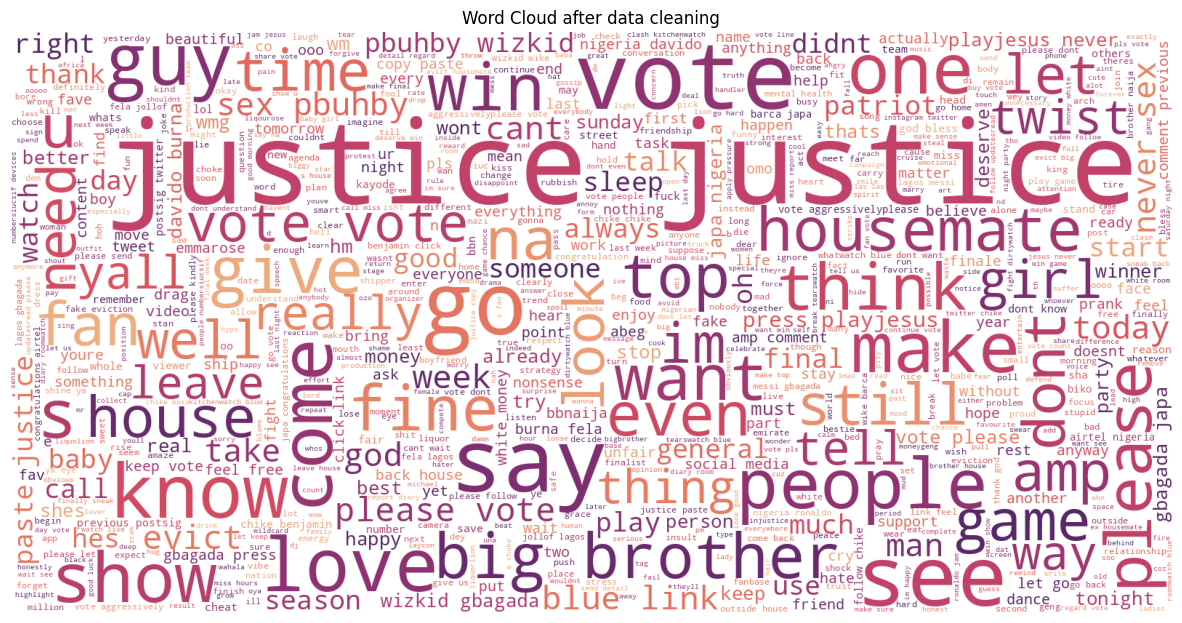

In [13]:
# After cleaning, let's see the most common used word
plotWordCloud(df, 'Word Cloud after data cleaning')

## Find Sentiment

In [14]:
#dropping rows with `only space character` tweets 
df['Cleaned Tweet'] = df['Cleaned Tweet'].replace(r'^\s*$', np.nan, regex=True)#.str.strip()
df = df.dropna(subset='Cleaned Tweet').reset_index(drop=True)

df['Sentiment'] = df['Cleaned Tweet'].apply(lambda x: getSentiment(x))

df[['Cleaned Tweet', 'Sentiment']].iloc[500:510]

,Cleaned Tweet,Sentiment
500,lemaooooo efcc crack laughter office hqtrs,Neutral
501,evil understand sky inside big brother naija houseevil cover understand word twist,Negative
502,succumb fan oncegive direct access finals,Positive
503,way lot us misjudge call fake thats way misjudge say hes fuck sure tell happen btw u pretend know never god keep vindicate,Negative
504,yes earn th position let back house one hat sponsor show hence win task talk thats bullcrap would celebrate stop victim shii,Positive
505,find hot situation,Positive
506,annoy thing tonights eviction apart issue get vote combine yet ask leave nonsense,Neutral
507,top storiesmore website,Positive
508,bad guy reveal plan fuck,Negative
509,politics want go back politics stronger tell make take opon make sure never sex house could ruin political career god bless wm,Positive


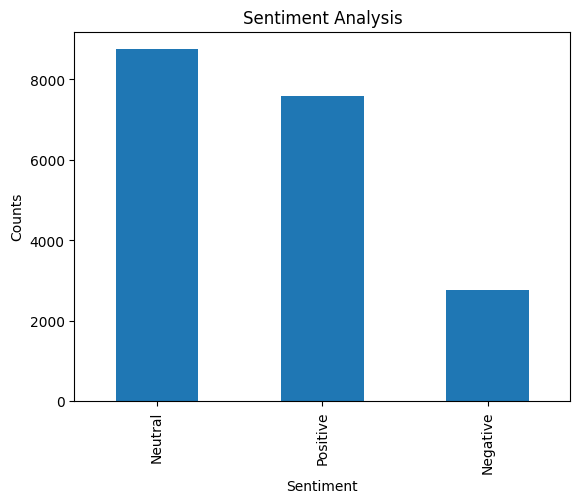

In [15]:
## plot visualization of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# Filter the DataFrame for positive sentiment
pos_df = df[df.Sentiment == 'Positive']

# Filter the DataFrame for negative sentiment
neg_df = df[df.Sentiment == 'Negative']

# Filter the DataFrame for neutral sentiment
neu_df = df[df.Sentiment == 'Neutral']

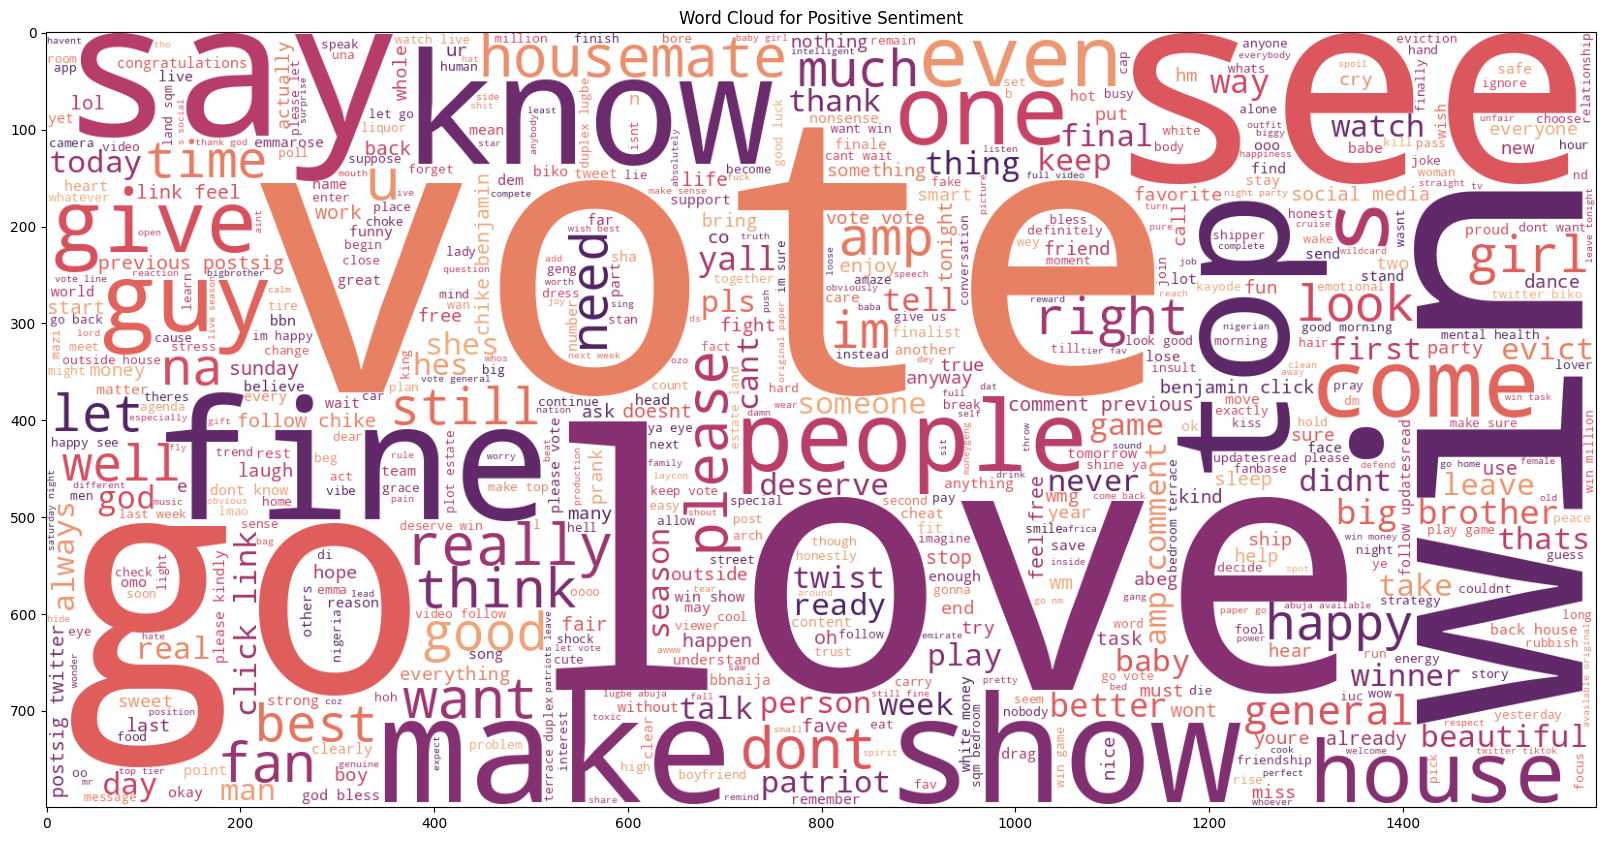

In [17]:
plt.figure(figsize=(20,20))
plt.title('Word Cloud for Positive Sentiment')
pos_wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white",
                colormap='flare').generate(' '.join(pos_df['Cleaned Tweet']))

plt.imshow(pos_wc)

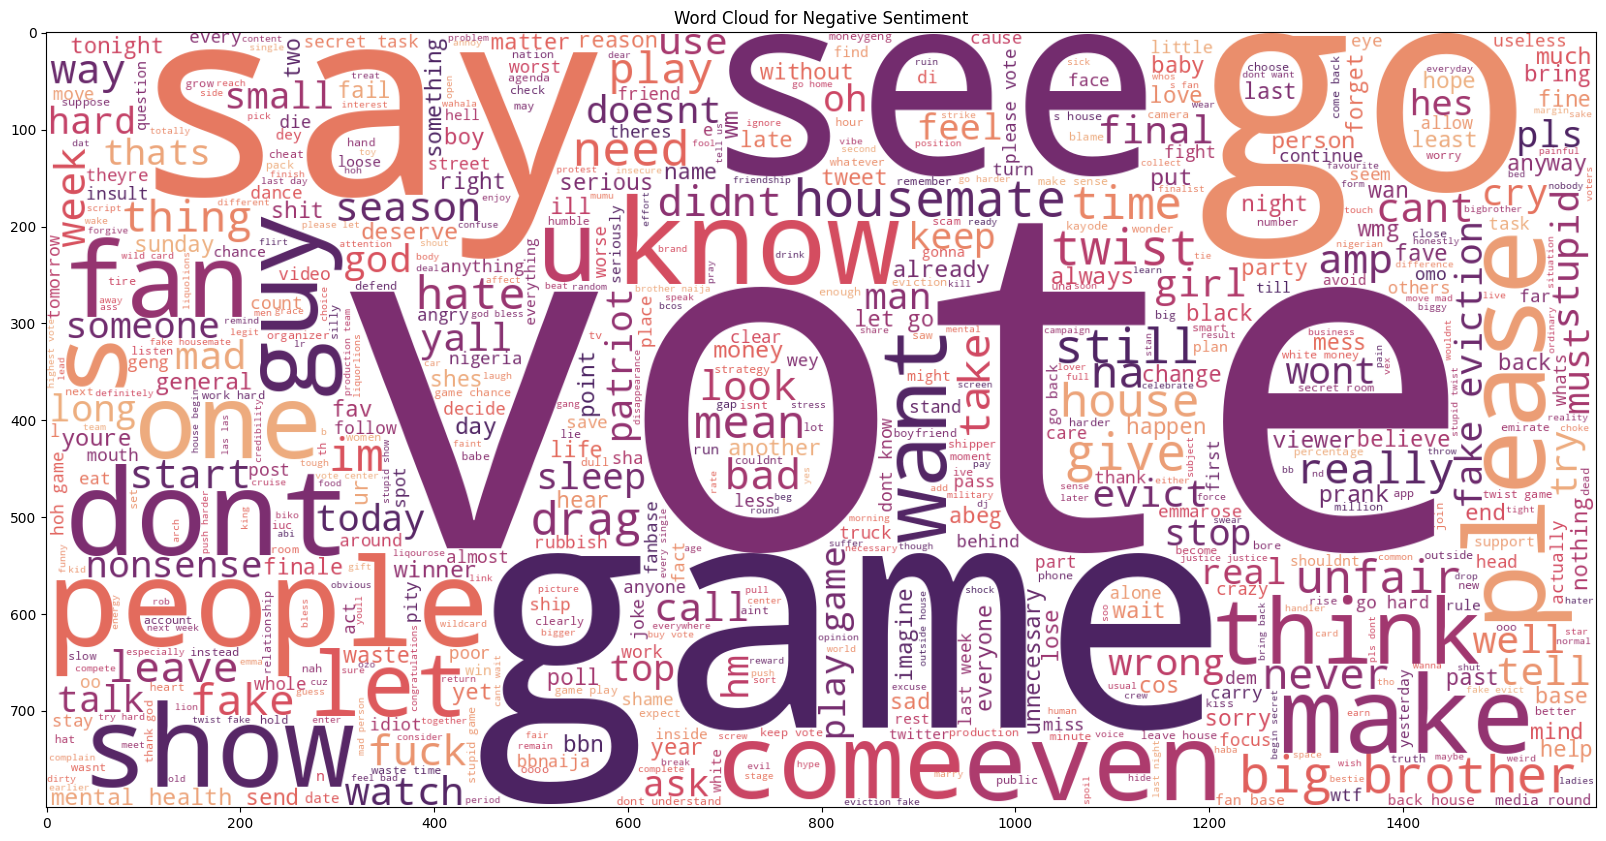

In [18]:
plt.figure(figsize=(20,20))
plt.title('Word Cloud for Negative Sentiment')
neg_wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white",
                colormap='flare').generate(' '.join(neg_df['Cleaned Tweet']))

plt.imshow(neg_wc)

In [19]:
df['Sentiment'].value_counts()

Sentiment
Neutral     8750
Positive    7597
Negative    2759
Name: count, dtype: int64

## Save data

In [ ]:


#Save data
data = pd.DataFrame()
data['text'] = df['Cleaned Tweet']
data['sentiment'] = df['Sentiment'].apply(encSentiment)

data.to_csv('processed_data.csv', index=False)